In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("PVA_features.csv")

In [4]:
df

,call_timestamp,callref,current_age,sex,years_since_first_symptom,fundamental_freq,fundamental_freq_std,Jitter,RAP,PPQ,SPPQ,Shimmer,RSDVA,APQ,SAPQ,NHR,VTI,SPI,on_treatment_id,Target
0,2014/01/11 02:20:08 UTC +0000,1749611,39,F,32,150.82127,787.773575,3.043524,0.466040,3.389985,44.455531,-0.936114,-91977.681840,83.820481,166.683519,0.004304,0.039660,0.804977,False,1
1,2014/01/22 04:30:16 UTC +0000,3812301,64,M,8,146.92941,1510.197058,2.542658,0.325218,16.381329,44.205482,-1.017444,4964.843928,101.651603,166.673051,0.004597,0.092386,0.744562,True,1
2,2014/01/09 19:52:32 UTC +0000,6572221,66,F,13,153.09265,1753.066594,2.410086,0.192787,2.906834,23.104722,-1.082912,-37652.059490,68.621858,166.676942,0.028385,0.083205,0.405923,True,1
3,2014/01/08 18:40:05 UTC +0000,2388093,49,F,7,153.65819,1690.313366,2.446445,0.304100,2.635581,14.354979,-1.029603,-42727.206080,92.543255,166.679154,0.020588,0.079921,0.333582,True,1
4,2014/01/20 16:23:35 UTC +0000,2618085,51,F,11,151.61546,1361.879254,2.447181,0.312519,2.468181,12.187294,-0.831550,-39988.536460,77.622830,166.678030,0.005702,0.046155,0.481075,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,2014/03/10 03:49:46 UTC +0000,2034539,65,F,9,178.97552,1007.537544,3.530855,0.355486,2.408186,25.608127,-1.195810,-91349.227280,59.410602,166.686217,0.009778,0.088910,0.595077,True,1
775,2014/03/10 05:06:02 UTC +0000,4078150,55,F,0,149.90842,1819.308710,2.707083,0.318716,7.421225,17.618326,-0.846734,-121014.677700,65.206269,166.671795,0.007501,0.116289,0.424437,False,0
776,2014/03/10 12:37:55 UTC +0000,9778657,50,F,2,149.53152,1152.307668,3.629170,0.313017,1.345998,31.300191,-1.429273,538316.195000,79.541005,166.669880,0.008908,0.175997,0.386682,True,1
777,2014/03/10 20:37:22 UTC +0000,4452027,62,M,0,148.53487,823.692981,2.903446,0.446732,2.306650,15.063619,-1.237079,11171.028120,71.782639,166.680681,0.004207,0.069710,0.603865,True,0


In [5]:
df["sex"] = df["sex"].replace("F",0)
df["sex"] = df["sex"].replace("M",1)

In [6]:
df

,call_timestamp,callref,current_age,sex,years_since_first_symptom,fundamental_freq,fundamental_freq_std,Jitter,RAP,PPQ,SPPQ,Shimmer,RSDVA,APQ,SAPQ,NHR,VTI,SPI,on_treatment_id,Target
0,2014/01/11 02:20:08 UTC +0000,1749611,39,0.0,32,150.82127,787.773575,3.043524,0.466040,3.389985,44.455531,-0.936114,-91977.681840,83.820481,166.683519,0.004304,0.039660,0.804977,False,1
1,2014/01/22 04:30:16 UTC +0000,3812301,64,1.0,8,146.92941,1510.197058,2.542658,0.325218,16.381329,44.205482,-1.017444,4964.843928,101.651603,166.673051,0.004597,0.092386,0.744562,True,1
2,2014/01/09 19:52:32 UTC +0000,6572221,66,0.0,13,153.09265,1753.066594,2.410086,0.192787,2.906834,23.104722,-1.082912,-37652.059490,68.621858,166.676942,0.028385,0.083205,0.405923,True,1
3,2014/01/08 18:40:05 UTC +0000,2388093,49,0.0,7,153.65819,1690.313366,2.446445,0.304100,2.635581,14.354979,-1.029603,-42727.206080,92.543255,166.679154,0.020588,0.079921,0.333582,True,1
4,2014/01/20 16:23:35 UTC +0000,2618085,51,0.0,11,151.61546,1361.879254,2.447181,0.312519,2.468181,12.187294,-0.831550,-39988.536460,77.622830,166.678030,0.005702,0.046155,0.481075,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,2014/03/10 03:49:46 UTC +0000,2034539,65,0.0,9,178.97552,1007.537544,3.530855,0.355486,2.408186,25.608127,-1.195810,-91349.227280,59.410602,166.686217,0.009778,0.088910,0.595077,True,1
775,2014/03/10 05:06:02 UTC +0000,4078150,55,0.0,0,149.90842,1819.308710,2.707083,0.318716,7.421225,17.618326,-0.846734,-121014.677700,65.206269,166.671795,0.007501,0.116289,0.424437,False,0
776,2014/03/10 12:37:55 UTC +0000,9778657,50,0.0,2,149.53152,1152.307668,3.629170,0.313017,1.345998,31.300191,-1.429273,538316.195000,79.541005,166.669880,0.008908,0.175997,0.386682,True,1
777,2014/03/10 20:37:22 UTC +0000,4452027,62,1.0,0,148.53487,823.692981,2.903446,0.446732,2.306650,15.063619,-1.237079,11171.028120,71.782639,166.680681,0.004207,0.069710,0.603865,True,0


In [7]:
Y = df["Target"]
X = df.drop(["call_timestamp","callref","years_since_first_symptom","current_age","sex","Target","on_treatment_id"],axis=1)

In [8]:
X

,fundamental_freq,fundamental_freq_std,Jitter,RAP,PPQ,SPPQ,Shimmer,RSDVA,APQ,SAPQ,NHR,VTI,SPI
0,150.82127,787.773575,3.043524,0.466040,3.389985,44.455531,-0.936114,-91977.681840,83.820481,166.683519,0.004304,0.039660,0.804977
1,146.92941,1510.197058,2.542658,0.325218,16.381329,44.205482,-1.017444,4964.843928,101.651603,166.673051,0.004597,0.092386,0.744562
2,153.09265,1753.066594,2.410086,0.192787,2.906834,23.104722,-1.082912,-37652.059490,68.621858,166.676942,0.028385,0.083205,0.405923
3,153.65819,1690.313366,2.446445,0.304100,2.635581,14.354979,-1.029603,-42727.206080,92.543255,166.679154,0.020588,0.079921,0.333582
4,151.61546,1361.879254,2.447181,0.312519,2.468181,12.187294,-0.831550,-39988.536460,77.622830,166.678030,0.005702,0.046155,0.481075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,178.97552,1007.537544,3.530855,0.355486,2.408186,25.608127,-1.195810,-91349.227280,59.410602,166.686217,0.009778,0.088910,0.595077
775,149.90842,1819.308710,2.707083,0.318716,7.421225,17.618326,-0.846734,-121014.677700,65.206269,166.671795,0.007501,0.116289,0.424437
776,149.53152,1152.307668,3.629170,0.313017,1.345998,31.300191,-1.429273,538316.195000,79.541005,166.669880,0.008908,0.175997,0.386682
777,148.53487,823.692981,2.903446,0.446732,2.306650,15.063619,-1.237079,11171.028120,71.782639,166.680681,0.004207,0.069710,0.603865


In [9]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [10]:
# Upsample the minority class using SMOTE
smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(X, Y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [26]:
#X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.1, random_state=42)

In [70]:
# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(13,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [71]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [72]:
# Compile the model with binary crossentropy loss function and adam optimizer
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [73]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/400
33/33 [==============================] - 2s 34ms/step - loss: 0.6920 - accuracy: 0.5038 - val_loss: 0.6917 - val_accuracy: 0.5152
Epoch 2/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.5256 - val_loss: 0.6892 - val_accuracy: 0.5038
Epoch 3/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5322 - val_loss: 0.6874 - val_accuracy: 0.5417
Epoch 4/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5502 - val_loss: 0.6848 - val_accuracy: 0.5568
Epoch 5/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.5682 - val_loss: 0.6829 - val_accuracy: 0.5606
Epoch 6/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.5786 - val_loss: 0.6803 - val_accuracy: 0.5606
Epoch 7/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.5919 - val_loss: 0.6777 - val_accuracy: 0.5644
Epoch 8/400


Epoch 59/400
33/33 [==============================] - 0s 3ms/step - loss: 0.5512 - accuracy: 0.7746 - val_loss: 0.5794 - val_accuracy: 0.7159
Epoch 60/400
33/33 [==============================] - 0s 3ms/step - loss: 0.5485 - accuracy: 0.7746 - val_loss: 0.5780 - val_accuracy: 0.7121
Epoch 61/400
33/33 [==============================] - 0s 3ms/step - loss: 0.5458 - accuracy: 0.7756 - val_loss: 0.5757 - val_accuracy: 0.7159
Epoch 62/400
33/33 [==============================] - 0s 3ms/step - loss: 0.5436 - accuracy: 0.7794 - val_loss: 0.5739 - val_accuracy: 0.7159
Epoch 63/400
33/33 [==============================] - 0s 3ms/step - loss: 0.5408 - accuracy: 0.7746 - val_loss: 0.5714 - val_accuracy: 0.7197
Epoch 64/400
33/33 [==============================] - 0s 3ms/step - loss: 0.5380 - accuracy: 0.7803 - val_loss: 0.5689 - val_accuracy: 0.7311
Epoch 65/400
33/33 [==============================] - 0s 3ms/step - loss: 0.5353 - accuracy: 0.7812 - val_loss: 0.5674 - val_accuracy: 0.7273
Epoch 

33/33 [==============================] - 0s 3ms/step - loss: 0.2962 - accuracy: 0.9100 - val_loss: 0.3733 - val_accuracy: 0.8447
Epoch 174/400
33/33 [==============================] - 0s 3ms/step - loss: 0.2940 - accuracy: 0.9167 - val_loss: 0.3686 - val_accuracy: 0.8485
Epoch 175/400
33/33 [==============================] - 0s 3ms/step - loss: 0.2923 - accuracy: 0.9157 - val_loss: 0.3683 - val_accuracy: 0.8447
Epoch 176/400
33/33 [==============================] - 0s 3ms/step - loss: 0.2908 - accuracy: 0.9195 - val_loss: 0.3667 - val_accuracy: 0.8485
Epoch 177/400
33/33 [==============================] - 0s 3ms/step - loss: 0.2893 - accuracy: 0.9176 - val_loss: 0.3649 - val_accuracy: 0.8447
Epoch 178/400
33/33 [==============================] - 0s 3ms/step - loss: 0.2872 - accuracy: 0.9195 - val_loss: 0.3638 - val_accuracy: 0.8485
Epoch 179/400
33/33 [==============================] - 0s 3ms/step - loss: 0.2854 - accuracy: 0.9214 - val_loss: 0.3612 - val_accuracy: 0.8447
Epoch 180/400

33/33 [==============================] - 0s 3ms/step - loss: 0.1484 - accuracy: 0.9659 - val_loss: 0.2580 - val_accuracy: 0.9091
Epoch 288/400
33/33 [==============================] - 0s 4ms/step - loss: 0.1472 - accuracy: 0.9640 - val_loss: 0.2543 - val_accuracy: 0.9167
Epoch 289/400
33/33 [==============================] - 0s 4ms/step - loss: 0.1462 - accuracy: 0.9640 - val_loss: 0.2557 - val_accuracy: 0.9091
Epoch 290/400
33/33 [==============================] - 0s 3ms/step - loss: 0.1448 - accuracy: 0.9669 - val_loss: 0.2550 - val_accuracy: 0.9053
Epoch 291/400
33/33 [==============================] - 0s 3ms/step - loss: 0.1438 - accuracy: 0.9650 - val_loss: 0.2538 - val_accuracy: 0.9091
Epoch 292/400
33/33 [==============================] - 0s 3ms/step - loss: 0.1430 - accuracy: 0.9659 - val_loss: 0.2521 - val_accuracy: 0.9129
Epoch 293/400
33/33 [==============================] - 0s 3ms/step - loss: 0.1423 - accuracy: 0.9659 - val_loss: 0.2527 - val_accuracy: 0.9091
Epoch 294/400

In [231]:
# Evaluate the model on some testing data X_test and y_test
test_loss, test_acc = model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 275.5512 - accuracy: 0.5227


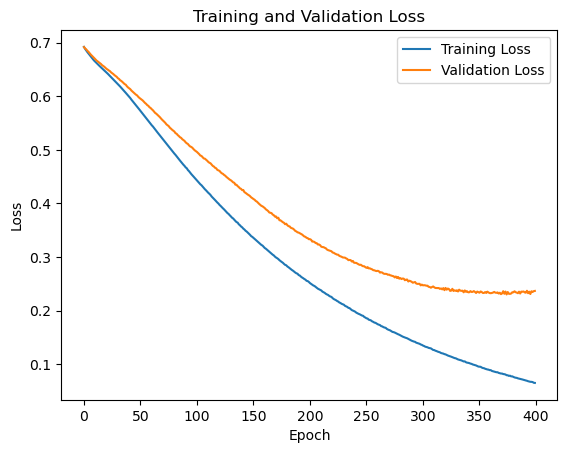

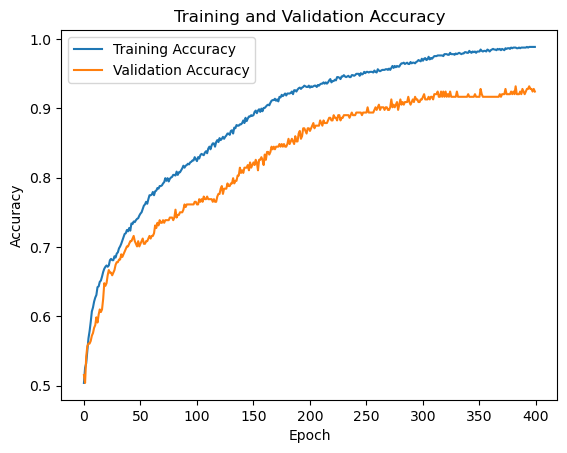

In [74]:
# Plot the loss curves for training and validation data
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves for training and validation data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [75]:
# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(13,)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [76]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [77]:
# Compile the model with binary crossentropy loss function and adam optimizer
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [78]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/400
33/33 [==============================] - 1s 8ms/step - loss: 0.7017 - accuracy: 0.4820 - val_loss: 0.6916 - val_accuracy: 0.4962
Epoch 2/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5076 - val_loss: 0.6897 - val_accuracy: 0.4962
Epoch 3/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.4953 - val_loss: 0.6874 - val_accuracy: 0.5000
Epoch 4/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5104 - val_loss: 0.6855 - val_accuracy: 0.5152
Epoch 5/400
33/33 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5312 - val_loss: 0.6839 - val_accuracy: 0.5379
Epoch 6/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6830 - accuracy: 0.5483 - val_loss: 0.6828 - val_accuracy: 0.5455
Epoch 7/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5208 - val_loss: 0.6817 - val_accuracy: 0.5568
Epoch 8/400
3

Epoch 59/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6154 - accuracy: 0.6866 - val_loss: 0.6048 - val_accuracy: 0.7311
Epoch 60/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6112 - accuracy: 0.6828 - val_loss: 0.6032 - val_accuracy: 0.7311
Epoch 61/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6159 - accuracy: 0.6761 - val_loss: 0.6033 - val_accuracy: 0.7348
Epoch 62/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6094 - accuracy: 0.7008 - val_loss: 0.6015 - val_accuracy: 0.7348
Epoch 63/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6119 - accuracy: 0.6941 - val_loss: 0.6003 - val_accuracy: 0.7348
Epoch 64/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6069 - accuracy: 0.6884 - val_loss: 0.5983 - val_accuracy: 0.7386
Epoch 65/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.7008 - val_loss: 0.5952 - val_accuracy: 0.7273
Epoch 

33/33 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.7708 - val_loss: 0.4866 - val_accuracy: 0.7765
Epoch 174/400
33/33 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.7879 - val_loss: 0.4843 - val_accuracy: 0.7765
Epoch 175/400
33/33 [==============================] - 0s 4ms/step - loss: 0.4908 - accuracy: 0.7689 - val_loss: 0.4820 - val_accuracy: 0.7803
Epoch 176/400
33/33 [==============================] - 0s 3ms/step - loss: 0.4928 - accuracy: 0.7689 - val_loss: 0.4826 - val_accuracy: 0.7727
Epoch 177/400
33/33 [==============================] - 0s 3ms/step - loss: 0.4971 - accuracy: 0.7765 - val_loss: 0.4847 - val_accuracy: 0.7727
Epoch 178/400
33/33 [==============================] - 0s 3ms/step - loss: 0.4715 - accuracy: 0.7973 - val_loss: 0.4802 - val_accuracy: 0.7803
Epoch 179/400
33/33 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.7917 - val_loss: 0.4804 - val_accuracy: 0.7727
Epoch 180/400

33/33 [==============================] - 0s 3ms/step - loss: 0.4109 - accuracy: 0.8153 - val_loss: 0.4133 - val_accuracy: 0.8030
Epoch 288/400
33/33 [==============================] - 0s 3ms/step - loss: 0.4166 - accuracy: 0.8229 - val_loss: 0.4150 - val_accuracy: 0.8068
Epoch 289/400
33/33 [==============================] - 0s 3ms/step - loss: 0.4201 - accuracy: 0.8153 - val_loss: 0.4124 - val_accuracy: 0.8030
Epoch 290/400
33/33 [==============================] - 0s 3ms/step - loss: 0.3928 - accuracy: 0.8352 - val_loss: 0.4086 - val_accuracy: 0.8106
Epoch 291/400
33/33 [==============================] - 0s 3ms/step - loss: 0.3962 - accuracy: 0.8362 - val_loss: 0.4105 - val_accuracy: 0.8068
Epoch 292/400
33/33 [==============================] - 0s 3ms/step - loss: 0.3917 - accuracy: 0.8295 - val_loss: 0.4048 - val_accuracy: 0.8030
Epoch 293/400
33/33 [==============================] - 0s 3ms/step - loss: 0.4022 - accuracy: 0.8295 - val_loss: 0.4033 - val_accuracy: 0.8068
Epoch 294/400

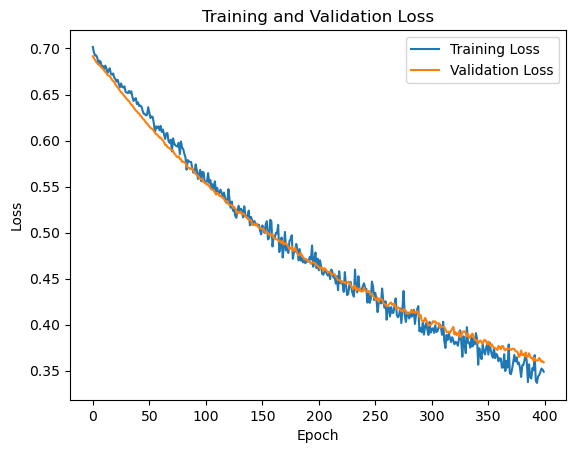

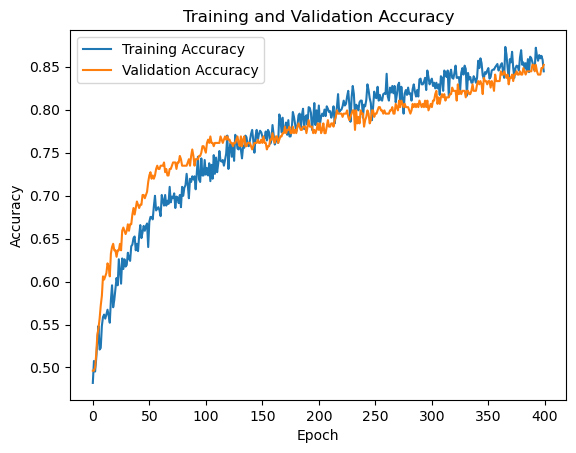

In [79]:
# Plot the loss curves for training and validation data
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves for training and validation data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(13,)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [19]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [20]:
# Compile the model with binary crossentropy loss function and adam optimizer
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [21]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/400
33/33 [==============================] - 1s 5ms/step - loss: 0.6969 - accuracy: 0.4924 - val_loss: 0.6855 - val_accuracy: 0.5000
Epoch 2/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5019 - val_loss: 0.6834 - val_accuracy: 0.5000
Epoch 3/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5000 - val_loss: 0.6815 - val_accuracy: 0.5114
Epoch 4/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5350 - val_loss: 0.6799 - val_accuracy: 0.5455
Epoch 5/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5284 - val_loss: 0.6785 - val_accuracy: 0.5682
Epoch 6/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.5464 - val_loss: 0.6770 - val_accuracy: 0.5644
Epoch 7/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.5426 - val_loss: 0.6755 - val_accuracy: 0.5758
Epoch 8/400
3

Epoch 59/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.7254 - val_loss: 0.5937 - val_accuracy: 0.7197
Epoch 60/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7254 - val_loss: 0.5931 - val_accuracy: 0.7311
Epoch 61/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.7273 - val_loss: 0.5916 - val_accuracy: 0.7235
Epoch 62/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5835 - accuracy: 0.7225 - val_loss: 0.5909 - val_accuracy: 0.7235
Epoch 63/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.7263 - val_loss: 0.5889 - val_accuracy: 0.7311
Epoch 64/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.7235 - val_loss: 0.5880 - val_accuracy: 0.7311
Epoch 65/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.7235 - val_loss: 0.5862 - val_accuracy: 0.7311
Epoch 

33/33 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8400 - val_loss: 0.4497 - val_accuracy: 0.8106
Epoch 174/400
33/33 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8295 - val_loss: 0.4496 - val_accuracy: 0.8030
Epoch 175/400
33/33 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8343 - val_loss: 0.4491 - val_accuracy: 0.7955
Epoch 176/400
33/33 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8494 - val_loss: 0.4471 - val_accuracy: 0.8106
Epoch 177/400
33/33 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8532 - val_loss: 0.4453 - val_accuracy: 0.8106
Epoch 178/400
33/33 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8400 - val_loss: 0.4456 - val_accuracy: 0.8030
Epoch 179/400
33/33 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8381 - val_loss: 0.4437 - val_accuracy: 0.8106
Epoch 180/400

33/33 [==============================] - 0s 2ms/step - loss: 0.2739 - accuracy: 0.9062 - val_loss: 0.3467 - val_accuracy: 0.8598
Epoch 288/400
33/33 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.8930 - val_loss: 0.3447 - val_accuracy: 0.8712
Epoch 289/400
33/33 [==============================] - 0s 2ms/step - loss: 0.2652 - accuracy: 0.9034 - val_loss: 0.3449 - val_accuracy: 0.8674
Epoch 290/400
33/33 [==============================] - 0s 2ms/step - loss: 0.2755 - accuracy: 0.8939 - val_loss: 0.3447 - val_accuracy: 0.8636
Epoch 291/400
33/33 [==============================] - 0s 2ms/step - loss: 0.2774 - accuracy: 0.9034 - val_loss: 0.3453 - val_accuracy: 0.8636
Epoch 292/400
33/33 [==============================] - 0s 2ms/step - loss: 0.2723 - accuracy: 0.8996 - val_loss: 0.3463 - val_accuracy: 0.8636
Epoch 293/400
33/33 [==============================] - 0s 2ms/step - loss: 0.2562 - accuracy: 0.9110 - val_loss: 0.3446 - val_accuracy: 0.8750
Epoch 294/400

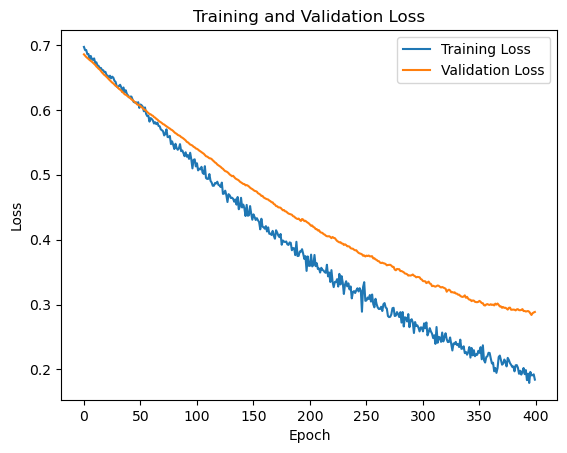

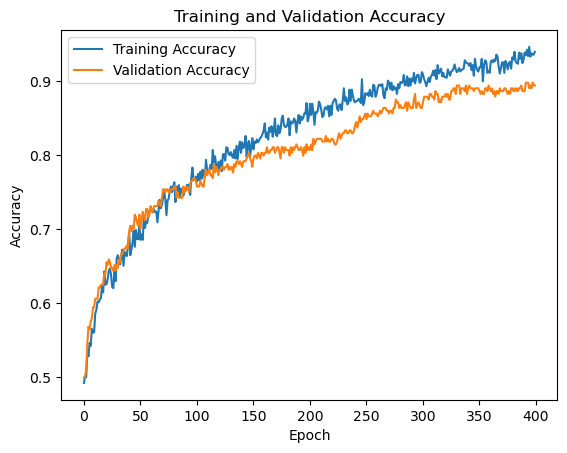

In [22]:
# Plot the loss curves for training and validation data
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves for training and validation data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [85]:
# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(13,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [86]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [87]:
# Compile the model with binary crossentropy loss function and adam optimizer
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [88]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/400
33/33 [==============================] - 1s 8ms/step - loss: 0.7033 - accuracy: 0.4735 - val_loss: 0.6923 - val_accuracy: 0.4886
Epoch 2/400
33/33 [==============================] - 0s 4ms/step - loss: 0.6968 - accuracy: 0.5028 - val_loss: 0.6895 - val_accuracy: 0.5038
Epoch 3/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5360 - val_loss: 0.6861 - val_accuracy: 0.5227
Epoch 4/400
33/33 [==============================] - 0s 4ms/step - loss: 0.6839 - accuracy: 0.5530 - val_loss: 0.6841 - val_accuracy: 0.5341
Epoch 5/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5407 - val_loss: 0.6817 - val_accuracy: 0.5492
Epoch 6/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.5473 - val_loss: 0.6797 - val_accuracy: 0.5568
Epoch 7/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.5464 - val_loss: 0.6778 - val_accuracy: 0.5606
Epoch 8/400
3

Epoch 59/400
33/33 [==============================] - 0s 3ms/step - loss: 0.5965 - accuracy: 0.7017 - val_loss: 0.5973 - val_accuracy: 0.7500
Epoch 60/400
33/33 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.7112 - val_loss: 0.5956 - val_accuracy: 0.7500
Epoch 61/400
33/33 [==============================] - 0s 3ms/step - loss: 0.5924 - accuracy: 0.7074 - val_loss: 0.5941 - val_accuracy: 0.7500
Epoch 62/400
33/33 [==============================] - 0s 3ms/step - loss: 0.5899 - accuracy: 0.7216 - val_loss: 0.5932 - val_accuracy: 0.7500
Epoch 63/400
33/33 [==============================] - 0s 4ms/step - loss: 0.5881 - accuracy: 0.7273 - val_loss: 0.5909 - val_accuracy: 0.7614
Epoch 64/400
33/33 [==============================] - 0s 3ms/step - loss: 0.5883 - accuracy: 0.6970 - val_loss: 0.5890 - val_accuracy: 0.7614
Epoch 65/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.7339 - val_loss: 0.5877 - val_accuracy: 0.7576
Epoch 

33/33 [==============================] - 0s 3ms/step - loss: 0.3949 - accuracy: 0.8456 - val_loss: 0.4337 - val_accuracy: 0.8106
Epoch 174/400
33/33 [==============================] - 0s 5ms/step - loss: 0.3948 - accuracy: 0.8428 - val_loss: 0.4328 - val_accuracy: 0.8068
Epoch 175/400
33/33 [==============================] - 0s 6ms/step - loss: 0.3901 - accuracy: 0.8447 - val_loss: 0.4303 - val_accuracy: 0.8106
Epoch 176/400
33/33 [==============================] - 0s 6ms/step - loss: 0.3805 - accuracy: 0.8551 - val_loss: 0.4300 - val_accuracy: 0.8030
Epoch 177/400
33/33 [==============================] - 0s 6ms/step - loss: 0.3840 - accuracy: 0.8494 - val_loss: 0.4295 - val_accuracy: 0.8068
Epoch 178/400
33/33 [==============================] - 0s 5ms/step - loss: 0.3861 - accuracy: 0.8466 - val_loss: 0.4270 - val_accuracy: 0.8144
Epoch 179/400
33/33 [==============================] - 0s 7ms/step - loss: 0.3793 - accuracy: 0.8532 - val_loss: 0.4265 - val_accuracy: 0.8144
Epoch 180/400

33/33 [==============================] - 0s 2ms/step - loss: 0.2431 - accuracy: 0.9242 - val_loss: 0.3248 - val_accuracy: 0.8788
Epoch 288/400
33/33 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.9157 - val_loss: 0.3244 - val_accuracy: 0.8750
Epoch 289/400
33/33 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.9205 - val_loss: 0.3218 - val_accuracy: 0.8712
Epoch 290/400
33/33 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.9233 - val_loss: 0.3201 - val_accuracy: 0.8674
Epoch 291/400
33/33 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.9422 - val_loss: 0.3201 - val_accuracy: 0.8788
Epoch 292/400
33/33 [==============================] - 0s 3ms/step - loss: 0.2430 - accuracy: 0.9214 - val_loss: 0.3198 - val_accuracy: 0.8788
Epoch 293/400
33/33 [==============================] - 0s 4ms/step - loss: 0.2360 - accuracy: 0.9252 - val_loss: 0.3194 - val_accuracy: 0.8788
Epoch 294/400

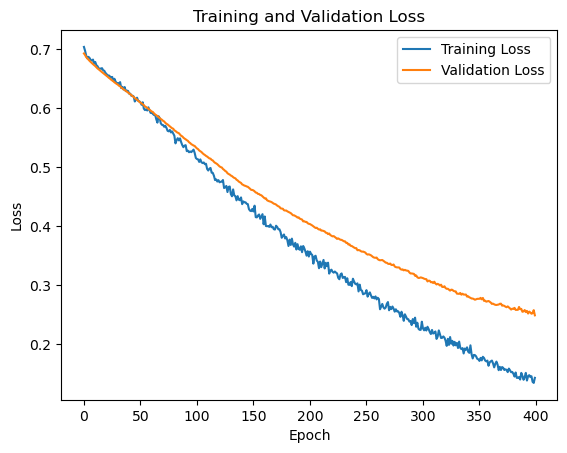

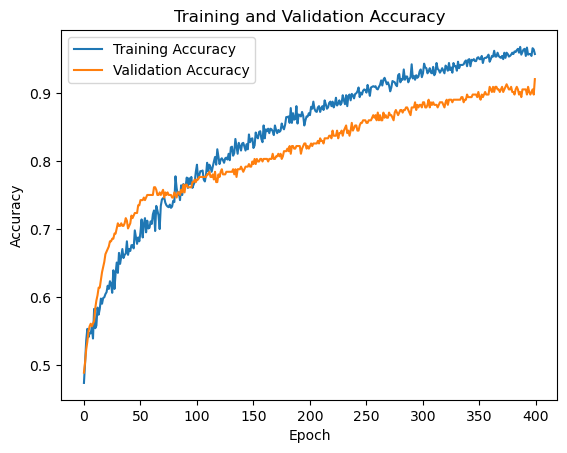

In [89]:
# Plot the loss curves for training and validation data
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves for training and validation data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [90]:
# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(13,)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [91]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [92]:
# Compile the model with binary crossentropy loss function and adam optimizer
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [93]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/400
33/33 [==============================] - 1s 8ms/step - loss: 0.6993 - accuracy: 0.4782 - val_loss: 0.6950 - val_accuracy: 0.4773
Epoch 2/400
33/33 [==============================] - 0s 3ms/step - loss: 0.7022 - accuracy: 0.4688 - val_loss: 0.6925 - val_accuracy: 0.4811
Epoch 3/400
33/33 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.4697 - val_loss: 0.6905 - val_accuracy: 0.4848
Epoch 4/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6967 - accuracy: 0.4678 - val_loss: 0.6887 - val_accuracy: 0.4848
Epoch 5/400
33/33 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5009 - val_loss: 0.6870 - val_accuracy: 0.4811
Epoch 6/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5152 - val_loss: 0.6855 - val_accuracy: 0.4659
Epoch 7/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.4924 - val_loss: 0.6837 - val_accuracy: 0.4811
Epoch 8/400
3

Epoch 59/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.6572 - val_loss: 0.6330 - val_accuracy: 0.6970
Epoch 60/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.6354 - val_loss: 0.6319 - val_accuracy: 0.7008
Epoch 61/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6347 - accuracy: 0.6610 - val_loss: 0.6307 - val_accuracy: 0.7008
Epoch 62/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.6610 - val_loss: 0.6291 - val_accuracy: 0.7045
Epoch 63/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6487 - val_loss: 0.6279 - val_accuracy: 0.6970
Epoch 64/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.6383 - val_loss: 0.6268 - val_accuracy: 0.6970
Epoch 65/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.6326 - val_loss: 0.6267 - val_accuracy: 0.6970
Epoch 

33/33 [==============================] - 0s 2ms/step - loss: 0.5322 - accuracy: 0.7424 - val_loss: 0.5362 - val_accuracy: 0.7424
Epoch 174/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5311 - accuracy: 0.7538 - val_loss: 0.5346 - val_accuracy: 0.7424
Epoch 175/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.7424 - val_loss: 0.5329 - val_accuracy: 0.7462
Epoch 176/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5261 - accuracy: 0.7453 - val_loss: 0.5334 - val_accuracy: 0.7424
Epoch 177/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5253 - accuracy: 0.7462 - val_loss: 0.5315 - val_accuracy: 0.7462
Epoch 178/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5249 - accuracy: 0.7330 - val_loss: 0.5328 - val_accuracy: 0.7424
Epoch 179/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5313 - accuracy: 0.7396 - val_loss: 0.5318 - val_accuracy: 0.7424
Epoch 180/400

33/33 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7794 - val_loss: 0.4738 - val_accuracy: 0.7727
Epoch 288/400
33/33 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7803 - val_loss: 0.4759 - val_accuracy: 0.7765
Epoch 289/400
33/33 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.7803 - val_loss: 0.4755 - val_accuracy: 0.7689
Epoch 290/400
33/33 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7737 - val_loss: 0.4737 - val_accuracy: 0.7765
Epoch 291/400
33/33 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.7879 - val_loss: 0.4735 - val_accuracy: 0.7803
Epoch 292/400
33/33 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7794 - val_loss: 0.4720 - val_accuracy: 0.7841
Epoch 293/400
33/33 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7737 - val_loss: 0.4733 - val_accuracy: 0.7841
Epoch 294/400

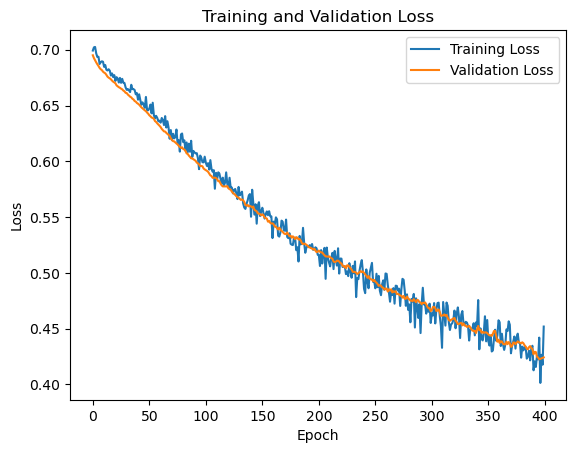

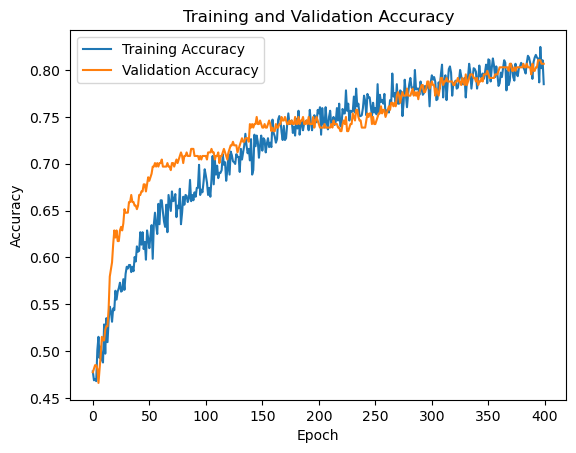

In [94]:
# Plot the loss curves for training and validation data
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves for training and validation data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [95]:
# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(13,)),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [96]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [97]:
# Compile the model with binary crossentropy loss function and adam optimizer
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [98]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/400
33/33 [==============================] - 1s 9ms/step - loss: 0.7058 - accuracy: 0.4801 - val_loss: 0.6935 - val_accuracy: 0.5189
Epoch 2/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.5085 - val_loss: 0.6900 - val_accuracy: 0.5417
Epoch 3/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5199 - val_loss: 0.6873 - val_accuracy: 0.5530
Epoch 4/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.5256 - val_loss: 0.6850 - val_accuracy: 0.5455
Epoch 5/400
33/33 [==============================] - 0s 4ms/step - loss: 0.6978 - accuracy: 0.4905 - val_loss: 0.6828 - val_accuracy: 0.5530
Epoch 6/400
33/33 [==============================] - 0s 4ms/step - loss: 0.7013 - accuracy: 0.4915 - val_loss: 0.6812 - val_accuracy: 0.5682
Epoch 7/400
33/33 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.4896 - val_loss: 0.6800 - val_accuracy: 0.5758
Epoch 8/400
3

Epoch 59/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6309 - accuracy: 0.6619 - val_loss: 0.6190 - val_accuracy: 0.7083
Epoch 60/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.6686 - val_loss: 0.6180 - val_accuracy: 0.7121
Epoch 61/400
33/33 [==============================] - 0s 4ms/step - loss: 0.6202 - accuracy: 0.6780 - val_loss: 0.6165 - val_accuracy: 0.7121
Epoch 62/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6222 - accuracy: 0.6705 - val_loss: 0.6142 - val_accuracy: 0.7159
Epoch 63/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6202 - accuracy: 0.6752 - val_loss: 0.6134 - val_accuracy: 0.7083
Epoch 64/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6201 - accuracy: 0.6913 - val_loss: 0.6121 - val_accuracy: 0.7083
Epoch 65/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.6752 - val_loss: 0.6109 - val_accuracy: 0.7083
Epoch 

33/33 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.8030 - val_loss: 0.4913 - val_accuracy: 0.7879
Epoch 174/400
33/33 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7917 - val_loss: 0.4897 - val_accuracy: 0.7879
Epoch 175/400
33/33 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.7983 - val_loss: 0.4886 - val_accuracy: 0.7879
Epoch 176/400
33/33 [==============================] - 0s 2ms/step - loss: 0.4773 - accuracy: 0.7917 - val_loss: 0.4884 - val_accuracy: 0.7879
Epoch 177/400
33/33 [==============================] - 0s 3ms/step - loss: 0.4759 - accuracy: 0.8011 - val_loss: 0.4860 - val_accuracy: 0.7879
Epoch 178/400
33/33 [==============================] - 0s 4ms/step - loss: 0.4796 - accuracy: 0.7973 - val_loss: 0.4864 - val_accuracy: 0.7879
Epoch 179/400
33/33 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.7992 - val_loss: 0.4868 - val_accuracy: 0.7879
Epoch 180/400

33/33 [==============================] - 0s 3ms/step - loss: 0.3761 - accuracy: 0.8456 - val_loss: 0.4168 - val_accuracy: 0.8258
Epoch 288/400
33/33 [==============================] - 0s 3ms/step - loss: 0.3895 - accuracy: 0.8295 - val_loss: 0.4169 - val_accuracy: 0.8258
Epoch 289/400
33/33 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.8381 - val_loss: 0.4164 - val_accuracy: 0.8220
Epoch 290/400
33/33 [==============================] - 0s 3ms/step - loss: 0.3912 - accuracy: 0.8248 - val_loss: 0.4155 - val_accuracy: 0.8258
Epoch 291/400
33/33 [==============================] - 0s 3ms/step - loss: 0.3812 - accuracy: 0.8381 - val_loss: 0.4138 - val_accuracy: 0.8258
Epoch 292/400
33/33 [==============================] - 0s 3ms/step - loss: 0.3727 - accuracy: 0.8371 - val_loss: 0.4120 - val_accuracy: 0.8333
Epoch 293/400
33/33 [==============================] - 0s 4ms/step - loss: 0.3890 - accuracy: 0.8475 - val_loss: 0.4114 - val_accuracy: 0.8371
Epoch 294/400

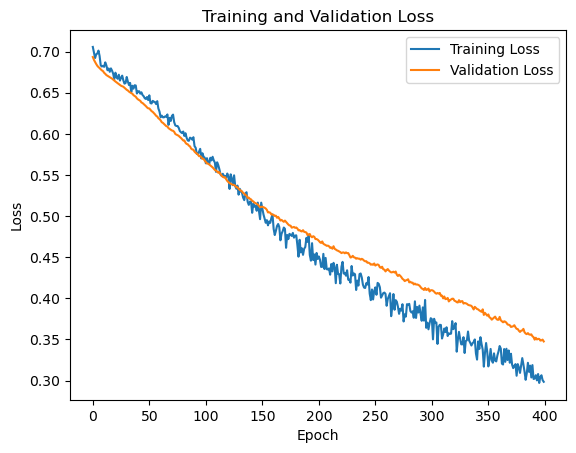

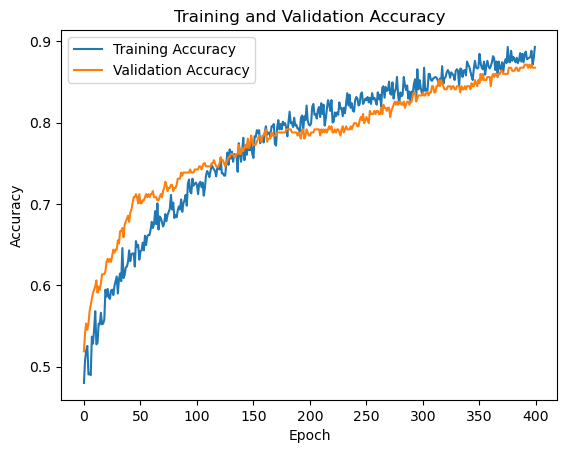

In [99]:
# Plot the loss curves for training and validation data
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves for training and validation data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [100]:
# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(13,)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [101]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [102]:
# Compile the model with binary crossentropy loss function and adam optimizer
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [103]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/400
33/33 [==============================] - 3s 8ms/step - loss: 0.7271 - accuracy: 0.4943 - val_loss: 0.6961 - val_accuracy: 0.5265
Epoch 2/400
33/33 [==============================] - 0s 4ms/step - loss: 0.7161 - accuracy: 0.4981 - val_loss: 0.6911 - val_accuracy: 0.5189
Epoch 3/400
33/33 [==============================] - 0s 3ms/step - loss: 0.7135 - accuracy: 0.4773 - val_loss: 0.6878 - val_accuracy: 0.5152
Epoch 4/400
33/33 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 0.4915 - val_loss: 0.6860 - val_accuracy: 0.5189
Epoch 5/400
33/33 [==============================] - 0s 4ms/step - loss: 0.6971 - accuracy: 0.4924 - val_loss: 0.6845 - val_accuracy: 0.5379
Epoch 6/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5066 - val_loss: 0.6832 - val_accuracy: 0.5227
Epoch 7/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4953 - val_loss: 0.6823 - val_accuracy: 0.5189
Epoch 8/400
3

Epoch 59/400
33/33 [==============================] - 0s 4ms/step - loss: 0.6472 - accuracy: 0.6269 - val_loss: 0.6400 - val_accuracy: 0.6667
Epoch 60/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6393 - accuracy: 0.6525 - val_loss: 0.6381 - val_accuracy: 0.6667
Epoch 61/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6397 - accuracy: 0.6477 - val_loss: 0.6382 - val_accuracy: 0.6591
Epoch 62/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6363 - accuracy: 0.6544 - val_loss: 0.6375 - val_accuracy: 0.6629
Epoch 63/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.6420 - val_loss: 0.6365 - val_accuracy: 0.6667
Epoch 64/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6396 - accuracy: 0.6496 - val_loss: 0.6348 - val_accuracy: 0.6705
Epoch 65/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6382 - accuracy: 0.6439 - val_loss: 0.6342 - val_accuracy: 0.6667
Epoch 

33/33 [==============================] - 0s 3ms/step - loss: 0.5326 - accuracy: 0.7585 - val_loss: 0.5536 - val_accuracy: 0.7348
Epoch 174/400
33/33 [==============================] - 0s 3ms/step - loss: 0.5414 - accuracy: 0.7405 - val_loss: 0.5543 - val_accuracy: 0.7273
Epoch 175/400
33/33 [==============================] - 0s 4ms/step - loss: 0.5348 - accuracy: 0.7443 - val_loss: 0.5515 - val_accuracy: 0.7500
Epoch 176/400
33/33 [==============================] - 0s 3ms/step - loss: 0.5388 - accuracy: 0.7396 - val_loss: 0.5524 - val_accuracy: 0.7462
Epoch 177/400
33/33 [==============================] - 0s 3ms/step - loss: 0.5378 - accuracy: 0.7367 - val_loss: 0.5515 - val_accuracy: 0.7424
Epoch 178/400
33/33 [==============================] - 0s 3ms/step - loss: 0.5529 - accuracy: 0.7301 - val_loss: 0.5523 - val_accuracy: 0.7311
Epoch 179/400
33/33 [==============================] - 0s 4ms/step - loss: 0.5413 - accuracy: 0.7358 - val_loss: 0.5503 - val_accuracy: 0.7500
Epoch 180/400

33/33 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.7992 - val_loss: 0.4907 - val_accuracy: 0.7803
Epoch 288/400
33/33 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7718 - val_loss: 0.4907 - val_accuracy: 0.7765
Epoch 289/400
33/33 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7850 - val_loss: 0.4884 - val_accuracy: 0.7803
Epoch 290/400
33/33 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7812 - val_loss: 0.4886 - val_accuracy: 0.7841
Epoch 291/400
33/33 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.7888 - val_loss: 0.4889 - val_accuracy: 0.7841
Epoch 292/400
33/33 [==============================] - 0s 3ms/step - loss: 0.4599 - accuracy: 0.7964 - val_loss: 0.4859 - val_accuracy: 0.7879
Epoch 293/400
33/33 [==============================] - 0s 3ms/step - loss: 0.4543 - accuracy: 0.8087 - val_loss: 0.4875 - val_accuracy: 0.7879
Epoch 294/400

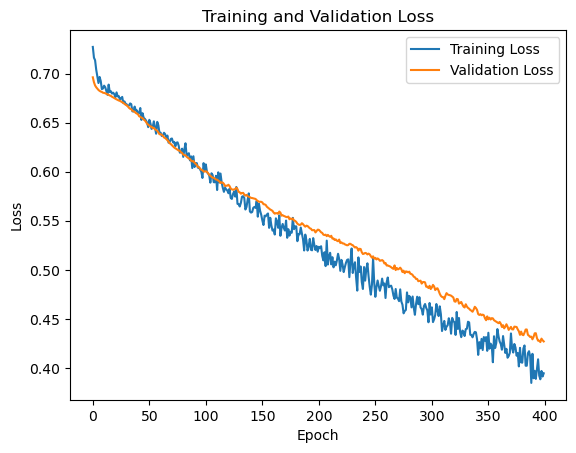

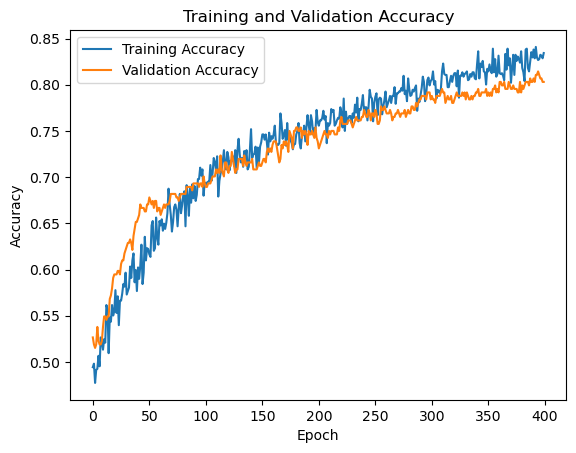

In [104]:
# Plot the loss curves for training and validation data
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves for training and validation data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [105]:
# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(13,)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [106]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [107]:
# Compile the model with binary crossentropy loss function and adam optimizer
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [108]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/400
33/33 [==============================] - 1s 6ms/step - loss: 0.7004 - accuracy: 0.4953 - val_loss: 0.6895 - val_accuracy: 0.5265
Epoch 2/400
33/33 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5360 - val_loss: 0.6884 - val_accuracy: 0.5265
Epoch 3/400
33/33 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5227 - val_loss: 0.6870 - val_accuracy: 0.5341
Epoch 4/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.4896 - val_loss: 0.6857 - val_accuracy: 0.5492
Epoch 5/400
33/33 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5256 - val_loss: 0.6844 - val_accuracy: 0.5606
Epoch 6/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.5085 - val_loss: 0.6832 - val_accuracy: 0.5682
Epoch 7/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5170 - val_loss: 0.6821 - val_accuracy: 0.5682
Epoch 8/400
3

Epoch 59/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6540 - accuracy: 0.6032 - val_loss: 0.6338 - val_accuracy: 0.6894
Epoch 60/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6535 - accuracy: 0.6222 - val_loss: 0.6331 - val_accuracy: 0.6894
Epoch 61/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.5862 - val_loss: 0.6325 - val_accuracy: 0.6932
Epoch 62/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.6297 - val_loss: 0.6314 - val_accuracy: 0.6932
Epoch 63/400
33/33 [==============================] - 0s 3ms/step - loss: 0.6469 - accuracy: 0.6354 - val_loss: 0.6304 - val_accuracy: 0.6932
Epoch 64/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6464 - accuracy: 0.6146 - val_loss: 0.6296 - val_accuracy: 0.6932
Epoch 65/400
33/33 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.6098 - val_loss: 0.6284 - val_accuracy: 0.7083
Epoch 

33/33 [==============================] - 0s 2ms/step - loss: 0.5798 - accuracy: 0.6960 - val_loss: 0.5472 - val_accuracy: 0.7386
Epoch 174/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5785 - accuracy: 0.6979 - val_loss: 0.5470 - val_accuracy: 0.7424
Epoch 175/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5732 - accuracy: 0.6922 - val_loss: 0.5466 - val_accuracy: 0.7424
Epoch 176/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.6979 - val_loss: 0.5456 - val_accuracy: 0.7424
Epoch 177/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.7131 - val_loss: 0.5448 - val_accuracy: 0.7424
Epoch 178/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5673 - accuracy: 0.7140 - val_loss: 0.5443 - val_accuracy: 0.7386
Epoch 179/400
33/33 [==============================] - 0s 3ms/step - loss: 0.5815 - accuracy: 0.6875 - val_loss: 0.5436 - val_accuracy: 0.7500
Epoch 180/400

33/33 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.7509 - val_loss: 0.4922 - val_accuracy: 0.7803
Epoch 288/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7434 - val_loss: 0.4920 - val_accuracy: 0.7841
Epoch 289/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5192 - accuracy: 0.7453 - val_loss: 0.4917 - val_accuracy: 0.7879
Epoch 290/400
33/33 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7746 - val_loss: 0.4915 - val_accuracy: 0.7803
Epoch 291/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.7519 - val_loss: 0.4913 - val_accuracy: 0.7841
Epoch 292/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.7585 - val_loss: 0.4899 - val_accuracy: 0.7879
Epoch 293/400
33/33 [==============================] - 0s 2ms/step - loss: 0.5026 - accuracy: 0.7509 - val_loss: 0.4892 - val_accuracy: 0.7803
Epoch 294/400

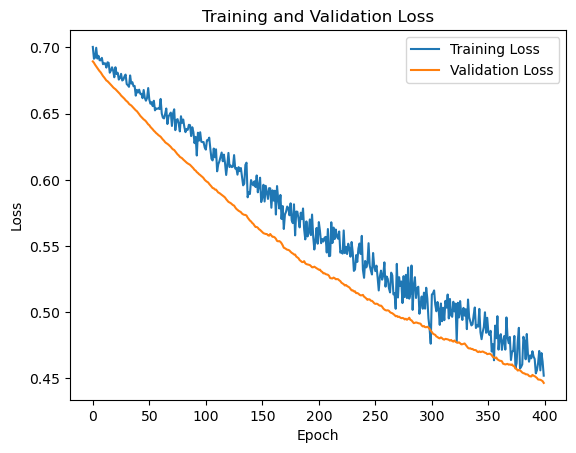

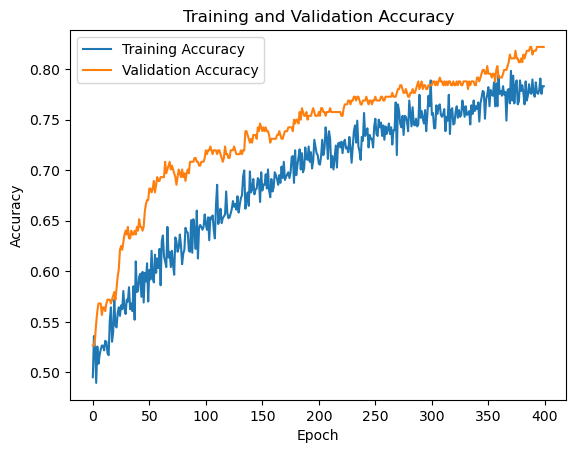

In [109]:
# Plot the loss curves for training and validation data
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curves for training and validation data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()